In [1]:
import os
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random as rd
import numpy as np
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

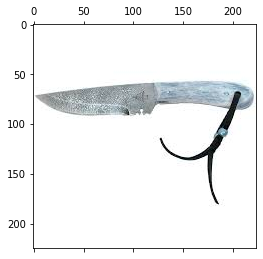

In [2]:
sample = cv2.imread('../input/knife-vs-pistol/Knife_vs_Pistol/Knife/285.jpg')
plt.matshow(sample)
plt.show()

# **Knife shapes**

In [3]:
knifes = os.listdir('../input/knife-vs-pistol/Knife_vs_Pistol/Knife/')
i = 1
avg_rows_knife = 0
avg_cols_knife = 0
for knife in knifes:
    sample = cv2.imread(f'../input/knife-vs-pistol/Knife_vs_Pistol/Knife/{knife}')
    if sample is not None:
        print(f'{i}: {knife}: {sample.shape}')
        avg_rows_knife += sample.shape[1]
        avg_cols_knife += sample.shape[0]
        i += 1

1: 208.jpg: (183, 275, 3)
2: 029.jpg: (225, 225, 3)
3: 014.jpg: (225, 225, 3)
4: 333.jpg: (225, 225, 3)
5: 369.jpg: (225, 225, 3)
6: 275.jpg: (225, 225, 3)
7: 212.jpg: (225, 225, 3)
8: 239.jpg: (183, 275, 3)
9: 149.jpg: (157, 322, 3)
10: 436.jpg: (238, 212, 3)
11: 355.jpg: (225, 225, 3)
12: 342.jpg: (145, 348, 3)
13: 429.jpg: (183, 275, 3)
14: 377.jpg: (225, 225, 3)
15: 272.jpg: (187, 269, 3)
16: 270.jpg: (225, 225, 3)
17: 215.jpg: (222, 227, 3)
18: 049.jpg: (225, 225, 3)
19: 243.jpg: (259, 194, 3)
20: 048.jpg: (148, 340, 3)
21: 189.jpg: (225, 225, 3)
22: 327.jpg: (183, 275, 3)
23: 253.jpg: (225, 225, 3)
24: 343.jpg: (183, 275, 3)
25: 115.jpg: (238, 212, 3)
26: 446.jpg: (225, 225, 3)
27: 425.jpg: (225, 225, 3)
28: 366.jpg: (225, 225, 3)
29: 062.jpg: (225, 225, 3)
30: 426.jpg: (225, 225, 3)
31: 440.jpg: (225, 225, 3)
32: 260.jpg: (183, 275, 3)
33: 202.jpg: (225, 225, 3)
34: 273.jpg: (225, 225, 3)
35: 286.jpg: (159, 318, 3)
36: 283.jpg: (197, 256, 3)
37: 359.jpg: (225, 225, 3)
38: 265.jp

# **Average Size of Knife**

In [ ]:
int(avg_rows_knife/i), int(avg_cols_knife/i)

# **Pistol Shapes**

In [4]:
!ls ../input/knife-vs-pistol/Knife_vs_Pistol/Pistol/

014.jpg  039.jpg  075.jpg  102.jpg  113.jpg  127.jpg  139.jpg  156.jpg	167.jpg
015.jpg  048.jpg  076.jpg  103.jpg  114.jpg  128.jpg  143.jpg  157.jpg	168.jpg
016.jpg  049.jpg  077.jpg  104.jpg  115.jpg  129.jpg  144.jpg  158.jpg	169.jpg
017.jpg  060.jpg  088.jpg  105.jpg  116.jpg  131.jpg  146.jpg  159.jpg	170.jpg
026.jpg  061.jpg  089.jpg  106.jpg  117.jpg  132.jpg  147.jpg  160.jpg	171.jpg
027.jpg  062.jpg  096.jpg  107.jpg  120.jpg  133.jpg  148.jpg  161.jpg
028.jpg  063.jpg  097.jpg  108.jpg  121.jpg  134.jpg  149.jpg  162.jpg
029.jpg  067.jpg  098.jpg  109.jpg  122.jpg  135.jpg  150.jpg  163.jpg
032.jpg  072.jpg  099.jpg  110.jpg  123.jpg  136.jpg  152.jpg  164.jpg
033.jpg  073.jpg  100.jpg  111.jpg  125.jpg  137.jpg  153.jpg  165.jpg
038.jpg  074.jpg  101.jpg  112.jpg  126.jpg  138.jpg  154.jpg  166.jpg


In [5]:
Pistols = os.listdir('../input/knife-vs-pistol/Knife_vs_Pistol/Pistol/')
i = 1
avg_rows_pistol = 0
avg_cols_pistol = 0
for pistol in Pistols:
    sample = cv2.imread(f'../input/knife-vs-pistol/Knife_vs_Pistol/Pistol/{pistol}')
    if sample is not None:
        print(f'{i}: {pistol}: {sample.shape}')
        avg_rows_pistol += sample.shape[1]
        avg_cols_pistol += sample.shape[0]
        i += 1

1: 029.jpg: (216, 233, 3)
2: 014.jpg: (168, 300, 3)
3: 150.jpg: (183, 275, 3)
4: 109.jpg: (183, 276, 3)
5: 149.jpg: (162, 311, 3)
6: 033.jpg: (183, 275, 3)
7: 049.jpg: (225, 225, 3)
8: 048.jpg: (135, 374, 3)
9: 153.jpg: (192, 263, 3)
10: 143.jpg: (183, 275, 3)
11: 115.jpg: (194, 259, 3)
12: 131.jpg: (162, 310, 3)
13: 062.jpg: (204, 248, 3)
14: 067.jpg: (134, 376, 3)
15: 106.jpg: (193, 261, 3)
16: 163.jpg: (224, 224, 3)
17: 113.jpg: (190, 265, 3)
18: 160.jpg: (129, 389, 3)
19: 156.jpg: (183, 275, 3)
20: 120.jpg: (290, 174, 3)
21: 089.jpg: (177, 284, 3)
22: 076.jpg: (183, 275, 3)
23: 123.jpg: (194, 259, 3)
24: 028.jpg: (194, 259, 3)
25: 167.jpg: (183, 275, 3)
26: 112.jpg: (183, 275, 3)
27: 152.jpg: (152, 331, 3)
28: 101.jpg: (195, 259, 3)
29: 117.jpg: (196, 257, 3)
30: 027.jpg: (160, 315, 3)
31: 137.jpg: (186, 271, 3)
32: 127.jpg: (183, 275, 3)
33: 075.jpg: (266, 190, 3)
34: 015.jpg: (183, 275, 3)
35: 105.jpg: (168, 300, 3)
36: 072.jpg: (197, 256, 3)
37: 111.jpg: (182, 276, 3)
38: 017.jp

# **Average Size of Pistol**

In [6]:
int(avg_rows_pistol/i),int(avg_cols_pistol/i)

(266, 187)

# **Resizing the images by taking the average of Knife and Pistols.**

In [7]:
(((266+250)//2)+((205+187)//2))//2

227

# **We have to resize all the images into (227, 227)**

In [9]:
!mkdir resized
!mkdir resized/knifes
!mkdir resized/pistols

In [10]:
!ls resized

knifes	pistols


# **Resizing Knife images**

In [11]:
knifes = os.listdir('../input/knife-vs-pistol/Knife_vs_Pistol/Knife/')
i = 0
for knife in knifes:
    sample = cv2.imread(f'../input/knife-vs-pistol/Knife_vs_Pistol/Knife/{knife}')
    if sample is not None:
        resized = cv2.resize(sample, (227,227))
        gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(f'resized/knifes/{i}.jpg',gray)
    i += 1

# **Check Resized Images**

In [12]:
!ls resized/knifes

0.jpg	 131.jpg  164.jpg  197.jpg  229.jpg  261.jpg  294.jpg  38.jpg  70.jpg
1.jpg	 132.jpg  165.jpg  198.jpg  23.jpg   262.jpg  295.jpg  39.jpg  71.jpg
10.jpg	 133.jpg  166.jpg  199.jpg  230.jpg  263.jpg  296.jpg  4.jpg   72.jpg
100.jpg  134.jpg  167.jpg  2.jpg    231.jpg  264.jpg  297.jpg  40.jpg  73.jpg
101.jpg  135.jpg  168.jpg  20.jpg   232.jpg  265.jpg  298.jpg  41.jpg  74.jpg
102.jpg  136.jpg  169.jpg  200.jpg  233.jpg  266.jpg  299.jpg  42.jpg  75.jpg
103.jpg  137.jpg  17.jpg   201.jpg  234.jpg  267.jpg  3.jpg    43.jpg  76.jpg
104.jpg  138.jpg  170.jpg  202.jpg  235.jpg  268.jpg  30.jpg   44.jpg  77.jpg
105.jpg  139.jpg  171.jpg  203.jpg  236.jpg  269.jpg  300.jpg  45.jpg  78.jpg
106.jpg  14.jpg   172.jpg  204.jpg  237.jpg  27.jpg   301.jpg  46.jpg  79.jpg
107.jpg  140.jpg  173.jpg  205.jpg  238.jpg  270.jpg  302.jpg  47.jpg  8.jpg
108.jpg  141.jpg  174.jpg  206.jpg  239.jpg  271.jpg  303.jpg  48.jpg  80.jpg
109.jpg  142.jpg  175.jpg  207.jpg  24.jpg   272.jpg  304.jpg  49.jpg 

In [13]:
len(os.listdir('resized/knifes'))

320

# **Visualizing 5 random knife resized images**

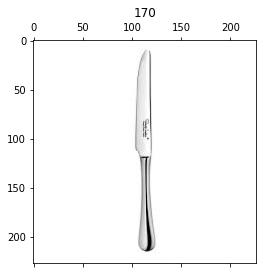

Shape: (227, 227, 3)




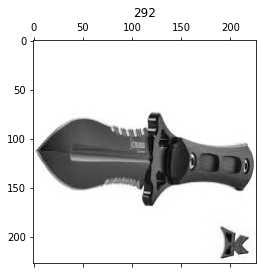

Shape: (227, 227, 3)




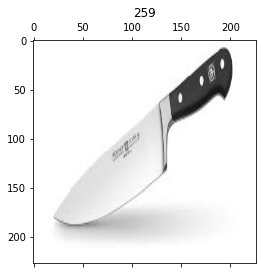

Shape: (227, 227, 3)




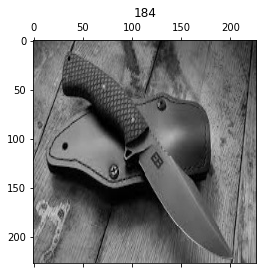

Shape: (227, 227, 3)




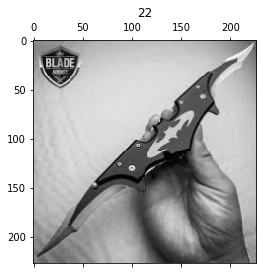

Shape: (227, 227, 3)




In [14]:
for i in range(5):
    n = rd.randint(1,320)
    k_img = cv2.imread(f'resized/knifes/{n}.jpg')
    plt.matshow(k_img)
    plt.title(n)
    plt.show()
    print('Shape:',k_img.shape)
    print('\n')

# **Resizing Pistol images**

In [15]:
pistols = os.listdir('../input/knife-vs-pistol/Knife_vs_Pistol/Pistol/')

i = 0
for pistol in pistols:
    sample = cv2.imread(f'../input/knife-vs-pistol/Knife_vs_Pistol/Pistol/{pistol}')
    if sample is not None:
        resized = cv2.resize(sample, (227,227))
        gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(f'resized/pistols/{i}.jpg',gray)
    i += 1

# **Check Resized Pistols**

In [16]:
!ls resized/pistols

0.jpg	18.jpg	27.jpg	36.jpg	45.jpg	55.jpg	64.jpg	73.jpg	82.jpg	91.jpg
1.jpg	19.jpg	28.jpg	37.jpg	46.jpg	56.jpg	65.jpg	74.jpg	83.jpg	92.jpg
10.jpg	2.jpg	29.jpg	38.jpg	47.jpg	57.jpg	66.jpg	75.jpg	84.jpg
11.jpg	20.jpg	3.jpg	39.jpg	48.jpg	58.jpg	67.jpg	76.jpg	85.jpg
12.jpg	21.jpg	30.jpg	4.jpg	49.jpg	59.jpg	68.jpg	77.jpg	86.jpg
13.jpg	22.jpg	31.jpg	40.jpg	5.jpg	6.jpg	69.jpg	78.jpg	87.jpg
14.jpg	23.jpg	32.jpg	41.jpg	51.jpg	60.jpg	7.jpg	79.jpg	88.jpg
15.jpg	24.jpg	33.jpg	42.jpg	52.jpg	61.jpg	70.jpg	8.jpg	89.jpg
16.jpg	25.jpg	34.jpg	43.jpg	53.jpg	62.jpg	71.jpg	80.jpg	9.jpg
17.jpg	26.jpg	35.jpg	44.jpg	54.jpg	63.jpg	72.jpg	81.jpg	90.jpg


In [17]:
len(os.listdir('resized/pistols'))

92

# **Visualizing 5 random pistol resized images**

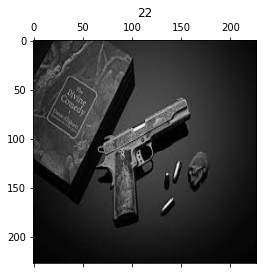

Shape: (227, 227, 3)




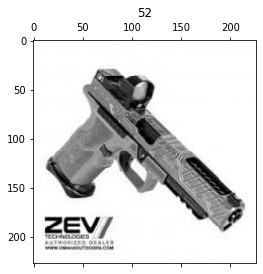

Shape: (227, 227, 3)




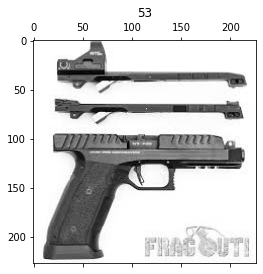

Shape: (227, 227, 3)




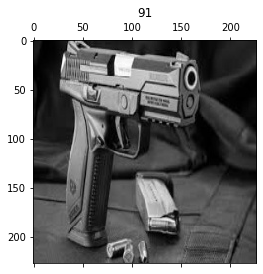

Shape: (227, 227, 3)




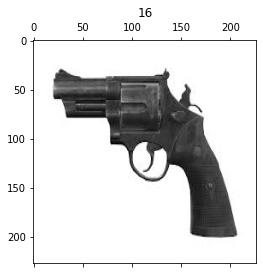

Shape: (227, 227, 3)




In [23]:
for i in range(5):
    n = rd.randint(1,91)
    p_img = cv2.imread(f'resized/pistols/{n}.jpg')
    plt.matshow(p_img)
    plt.title(n)
    plt.show()
    print('Shape:',p_img.shape)
    print('\n')

# **Data Preparation**

In [20]:
X = []
Y= []

#Knifes = 1
#Pistols = 0

for k in os.listdir('resized/knifes/'):
    data = cv2.imread(f'resized/knifes/{k}')/255
    X.append(data)
    Y.append(1)
for p in os.listdir('resized/pistols/'):
    data = cv2.imread(f'resized/pistols/{p}')/255
    X.append(data)
    Y.append(0)


# **CNN Model Building and Predictions**

In [21]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=227, kernel_size=(3,3), activation='relu', input_shape=(227,227,3)),
    keras.layers.MaxPool2D((5,5)),
    keras.layers.Conv2D(filters=227*2, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(227*2,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [24]:
x = np.array(X)
y = np.array(Y)

In [26]:
model.fit(x, y, epochs=5) #Ranned twice

Epoch 1/5
13/13 [==============================] - 1s 73ms/step - loss: 0.2842 - accuracy: 0.8835
Epoch 2/5
13/13 [==============================] - 1s 72ms/step - loss: 0.2461 - accuracy: 0.9053
Epoch 3/5
13/13 [==============================] - 1s 72ms/step - loss: 0.1973 - accuracy: 0.9248
Epoch 4/5
13/13 [==============================] - 1s 72ms/step - loss: 0.1237 - accuracy: 0.9612
Epoch 5/5
13/13 [==============================] - 1s 71ms/step - loss: 0.0696 - accuracy: 0.9806


In [28]:
model.evaluate(x, y)

13/13 [==============================] - 0s 24ms/step - loss: 0.0483 - accuracy: 0.9879


[0.0482851080596447, 0.987864077091217]

In [30]:
predicted = model.predict(x).flatten()
predicted[predicted >= 0.5] = 1
predicted[predicted < 0.5] = 0

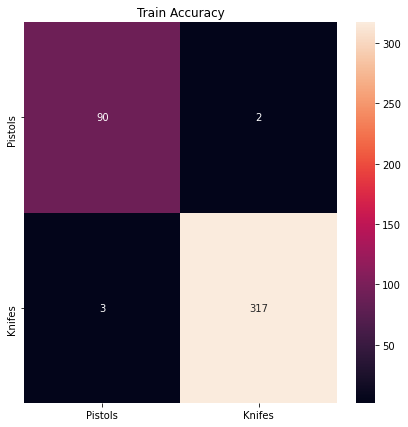

In [31]:
cm = confusion_matrix(Y, predicted)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True,fmt='g',xticklabels=['Pistols','Knifes'],yticklabels=['Pistols','Knifes'])
plt.title('Train Accuracy')
plt.show()

In [32]:
print(classification_report(Y,predicted))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        92
           1       0.99      0.99      0.99       320

    accuracy                           0.99       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.99      0.99      0.99       412



# **Predicions on Test Data**

In [33]:
!ls ../input/knife-vs-pistol/Knife_vs_Pistol

Knife  Pistol  eval_Knife  eval_pistol


In [34]:
!mkdir resized_test
!mkdir resized_test/knifes
!mkdir resized_test/pistols

In [35]:
path = '../input/knife-vs-pistol/Knife_vs_Pistol/'
knifes_test =os.listdir(path+'eval_Knife')
pistols_test =os.listdir(path+'eval_pistol')

In [36]:
len(knifes_test),len(pistols_test)

(11, 15)

006.jpg


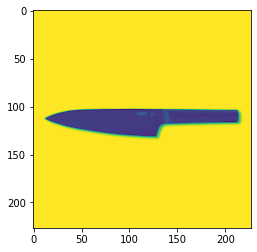

002.jpg


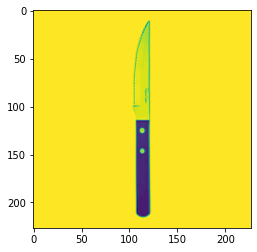

010.jpg


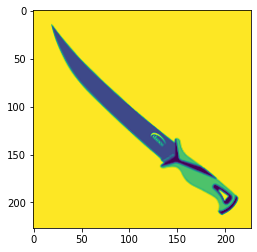

001.jpg
007.jpg


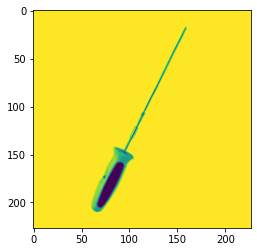

005.jpg


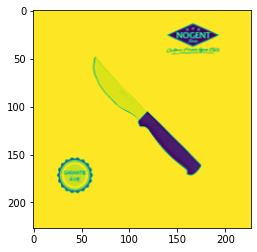

004.jpg


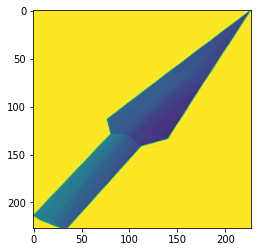

003.jpg


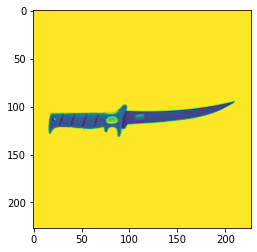

000.jpg


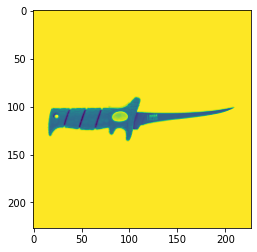

009.jpg


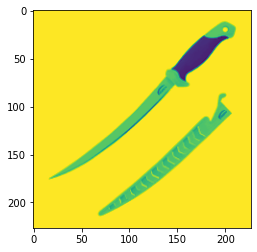

008.jpg


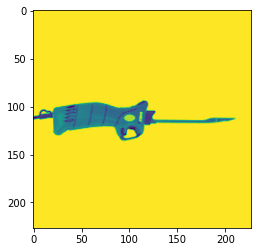

In [37]:
i = 0
for k in os.listdir('../input/knife-vs-pistol/Knife_vs_Pistol/eval_Knife'):
    print(k)
    sample = cv2.imread(f'../input/knife-vs-pistol/Knife_vs_Pistol/eval_Knife/{k}')
    if sample is not None:
        resize = cv2.resize(sample,(227,227))
        gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
        plt.imshow(gray)
        plt.show()
        cv2.imwrite(f'resized_test/knifes/{i}.jpg',gray)
        i += 1

014.jpg


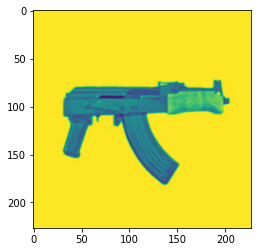

(227, 227)
006.jpg


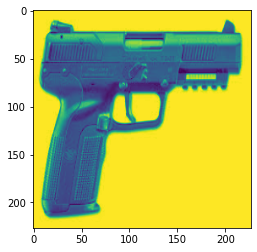

(227, 227)
011.jpg


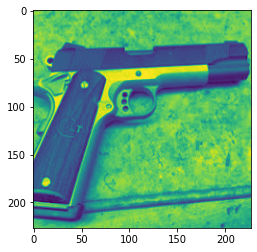

(227, 227)
002.jpg


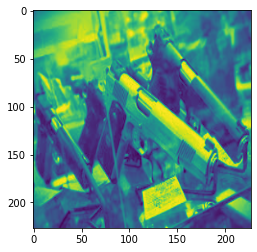

(227, 227)
012.jpg


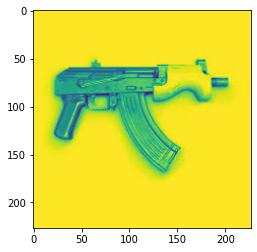

(227, 227)
010.jpg


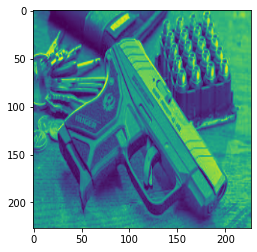

(227, 227)
001.jpg


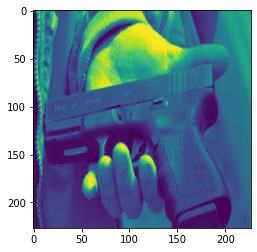

(227, 227)
007.jpg


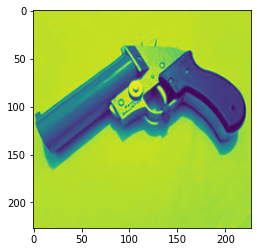

(227, 227)
005.jpg


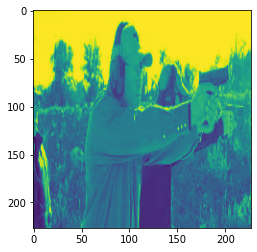

(227, 227)
004.jpg


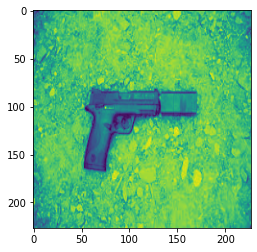

(227, 227)
003.jpg


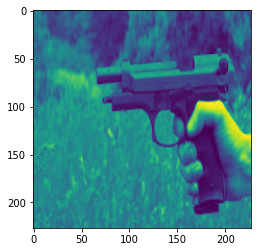

(227, 227)
000.jpg


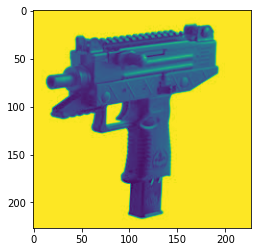

(227, 227)
009.jpg


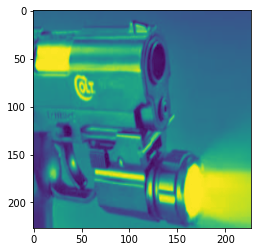

(227, 227)
008.jpg


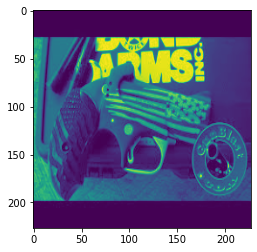

(227, 227)
013.jpg


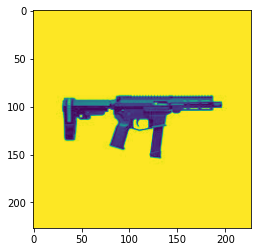

(227, 227)


In [39]:
i = 0
for p in os.listdir('../input/knife-vs-pistol/Knife_vs_Pistol/eval_pistol'):
    print(p)
    sample = cv2.imread(f'../input/knife-vs-pistol/Knife_vs_Pistol/eval_pistol/{p}')
    if sample is not None:
        resize = cv2.resize(sample,(227,227))
        gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
        plt.imshow(gray)
        plt.show()
        cv2.imwrite(f'resized_test/pistols/{i}.jpg',gray)
        i += 1

In [40]:
!ls resized_test/pistols

0.jpg  10.jpg  12.jpg  14.jpg  3.jpg  5.jpg  7.jpg  9.jpg
1.jpg  11.jpg  13.jpg  2.jpg   4.jpg  6.jpg  8.jpg


In [41]:
!ls resized_test/pistols/

0.jpg  10.jpg  12.jpg  14.jpg  3.jpg  5.jpg  7.jpg  9.jpg
1.jpg  11.jpg  13.jpg  2.jpg   4.jpg  6.jpg  8.jpg


In [42]:
Xtest = []
Ytest = []

#Knifes = 1
#Pistols = 0

for k in os.listdir('resized_test/knifes/'):
    data = cv2.imread(f'resized_test/knifes/{k}')/255
    Xtest.append(data)
    Ytest.append(1)
for p in os.listdir('resized_test/pistols/'):
    data = cv2.imread(f'resized_test/pistols/{p}')/255
    Xtest.append(data)
    Ytest.append(0)


In [44]:
np.array(Xtest).shape

(25, 227, 227, 3)

In [45]:
Xtest2 = np.array(Xtest)
Ytest2 = np.array(Ytest)

In [46]:
model.evaluate(Xtest2,Ytest2)

1/1 [==============================] - 1s 601ms/step - loss: 0.8930 - accuracy: 0.6400


[0.8930305242538452, 0.6399999856948853]

In [47]:
test_pred = model.predict(Xtest2)
test_pred[test_pred >= 0.5] = 1
test_pred[test_pred < 0.5] = 0

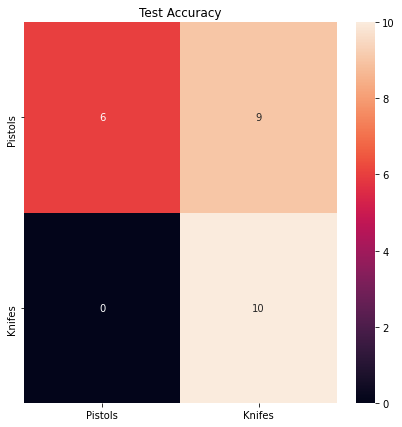

In [48]:
cm2 = confusion_matrix(Ytest2, test_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm2, annot=True,fmt='g',xticklabels=['Pistols','Knifes'],yticklabels=['Pistols','Knifes'])
plt.title('Test Accuracy')
plt.show()

# **OverFitted**

### **Let's Up Sample Pistol Images by adding rotational pistol images**

# **Rotate 90 degrees**

In [67]:
start = 320
for i in range(92):
    new_img = cv2.rotate(X[start],cv2.ROTATE_90_CLOCKWISE)
    X.append(new_img)
    start += 1

# **Rotate 180 degrees**

In [72]:
start = 320
for i in range(92):
    new_img = cv2.rotate(X[start],cv2.ROTATE_180)
    X.append(new_img)
    start += 1

In [73]:
start = 320
for i in range(92):
    new_img = cv2.rotate(X[start],cv2.ROTATE_90_COUNTERCLOCKWISE)
    X.append(new_img)
    start += 1

In [74]:
len(X)

689

# **Append Y Samples as well**

In [80]:
689-412

277

In [82]:
Y += [0 for i in range(277)]
len(Y)

689

In [75]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=227, kernel_size=(3,3), activation='relu', input_shape=(227,227,3)),
    keras.layers.MaxPool2D((5,5)),
    keras.layers.Conv2D(filters=227*2, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(227*2,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [76]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [83]:
x = np.array(X)
y = np.array(Y)
model.fit(x, y, epochs=5)

Epoch 1/5
22/22 [==============================] - 3s 103ms/step - loss: 2.6460 - accuracy: 0.4766
Epoch 2/5
22/22 [==============================] - 2s 72ms/step - loss: 0.6293 - accuracy: 0.6616
Epoch 3/5
22/22 [==============================] - 2s 71ms/step - loss: 0.5186 - accuracy: 0.7490
Epoch 4/5
22/22 [==============================] - 2s 71ms/step - loss: 0.4519 - accuracy: 0.7926
Epoch 5/5
22/22 [==============================] - 2s 71ms/step - loss: 0.3696 - accuracy: 0.8331


In [84]:
model.fit(x, y, epochs=5)

Epoch 1/5
22/22 [==============================] - 2s 71ms/step - loss: 0.3198 - accuracy: 0.8766
Epoch 2/5
22/22 [==============================] - 2s 70ms/step - loss: 0.2324 - accuracy: 0.9158
Epoch 3/5
22/22 [==============================] - 2s 71ms/step - loss: 0.1815 - accuracy: 0.9448
Epoch 4/5
22/22 [==============================] - 2s 71ms/step - loss: 0.1326 - accuracy: 0.9550
Epoch 5/5
22/22 [==============================] - 2s 71ms/step - loss: 0.1320 - accuracy: 0.9579


In [97]:
model.fit(x, y, epochs=5,batch_size=5)

Epoch 1/5
138/138 [==============================] - 3s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2/5
138/138 [==============================] - 3s 19ms/step - loss: 4.9805e-04 - accuracy: 1.0000
Epoch 3/5
138/138 [==============================] - 3s 19ms/step - loss: 2.9728e-04 - accuracy: 1.0000
Epoch 4/5
138/138 [==============================] - 3s 19ms/step - loss: 1.9101e-04 - accuracy: 1.0000
Epoch 5/5
138/138 [==============================] - 3s 19ms/step - loss: 1.6416e-04 - accuracy: 1.0000


In [108]:
model.evaluate(Xtest2,Ytest2)

1/1 [==============================] - 0s 37ms/step - loss: 1.9166 - accuracy: 0.7600


[1.9166040420532227, 0.7599999904632568]

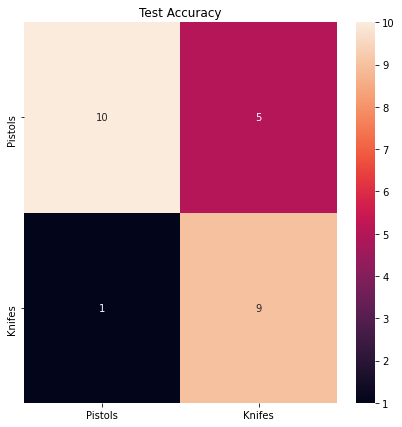

In [99]:
test_pred = model.predict(Xtest2)
test_pred[test_pred >= 0.5] = 1
test_pred[test_pred < 0.5] = 0
cm2 = confusion_matrix(Ytest2, test_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm2, annot=True,fmt='g',xticklabels=['Pistols','Knifes'],yticklabels=['Pistols','Knifes'])
plt.title('Test Accuracy')
plt.show()

In [109]:
print(classification_report(Ytest2,test_pred))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.64      0.90      0.75        10

    accuracy                           0.76        25
   macro avg       0.78      0.78      0.76        25
weighted avg       0.80      0.76      0.76        25

